# MNIST

we will be using the MNIST dataset, which is a set of 70,000 small
images of digits handwritten by high school students and employees of the US Cen‐
sus Bureau. Each image is labeled with the digit it represents. This set has been stud‐
ied so much that it is often called the “Hello World” of Machine Learning: whenever
people come up with a new classification algorithm, they are curious to see how it
will perform on MNIST. Whenever someone learns Machine Learning, sooner or
later they tackle MNIST.
Scikit-Learn provides many helper functions to download popular datasets. MNIST is
one of them. The following code fetches the MNIST dataset:1

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [21]:
X,y=mnist["data"],mnist["target"]

In [22]:
X.shape

(70000, 784)

In [23]:
y.shape

(70000,)

There are 70,000 images, and each image has 784 features. This is because each image
is 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0
(white) to 255 (black). Let’s take a peek at one digit from the dataset. All you need to
do is grab an instance’s feature vector, reshape it to a 28×28 array, and display it using
Matplotlib’s imshow() function:


In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

In [25]:
digit=X[36000]

In [26]:
digit_img=digit.reshape(28,28)

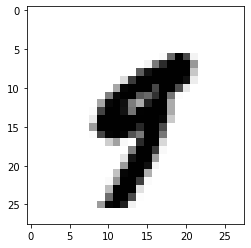

In [27]:
plt.imshow(digit_img,cmap=matplotlib.cm.binary)
#plt.axis("off")
plt.show()

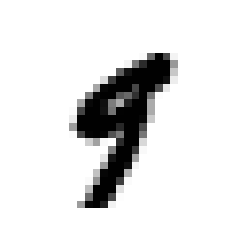

In [28]:
plt.imshow(digit_img,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [29]:
y[36000]

'9'

This looks like a 9, and indeed that’s what the label tells us:

Populating the interactive namespace from numpy and matplotlib


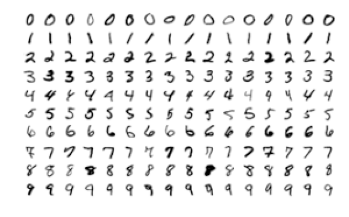

In [30]:
%pylab inline
plt.axis("off")
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('download.png')
imgplot = plt.imshow(img)
plt.show()
#if the above code looks complicated yoy can try pillow library of python to work with images


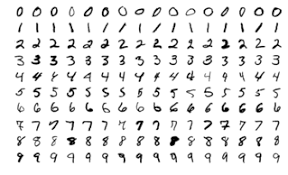

In [31]:
from PIL import Image
image=Image.open('download.png')
image

create a test set and set it aside before inspecting the data
closely. The MNIST dataset is actually already split into a training set (the first 60,000
images) and a test set (the last 10,000 images):

shuffle the training set; this will guarantee that all cross-validation folds will
be similar (you don’t want one fold to be missing some digits). Moreover, some learn‐
ing algorithms are sensitive to the order of the training instances, and they perform
poorly if they get many similar instances in a row. Shuffling the dataset ensures that
this won’t happen

Shuffling may be a bad idea in some contexts—for example, if you are working on time series data (such as
stock market prices or weather conditions

In [32]:
x_train,x_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [33]:
import numpy as np
shuffle_index=np.random.permutation(60000)

In [34]:
x_train,y_train=x_train[shuffle_index],y_train[shuffle_index]

# Training a Binary Classifier

Let’s simplify the problem for now and only try to identify one digit—for example,
the number 5. This “5-detector” will be an example of a binary classifier, capable of
distinguishing between just two classes, 5 and not-5. Let’s create the target vectors for
this classification task:

y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.

y_test_5 = (y_test == 5)

Okay, now let’s pick a classifier and train it. A good place to start is with a Stochastic
Gradient Descent (SGD) classifier, using Scikit-Learn’s SGDClassifier class. This clas‐
sifier has the advantage of being capable of handling very large datasets efficiently.
This is in part because SGD deals with training instances independently, one at a time
(which also makes SGD well suited for online learning), as we will see later. Let’s create
an SGDClassifier and train it on the whole training set:

In [39]:
y_train_5=(y_train=='5')
y_test_5=(y_test=='5')
np.unique(y_train_5)

array([False,  True])

In [40]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(x_train,y_train_5)

SGDClassifier(random_state=42)

The SGDClassifier relies on randomness during training (hence
the name “stochastic”). If you want reproducible results, you
should set the random_state parameter

In [42]:
sgd_clf.predict([digit])

array([False])

In [48]:
y[6004]

'5'

In [50]:
sgd_clf.predict([X[6004]])

array([ True])

The classifier guesses that this image represents a 5 (True). Looks like it guessed right
in this particular case! Now, let’s evaluate this model’s performance.


# Performance Measures

Evaluating a classifier is often significantly trickier than evaluating a regressor
# Measuring Accuracy Using Cross-Validation

# Implementing Cross-Validation

Occasionally you will need more control over the cross-validation process than what
cross_val_score() and similar functions provide. In these cases, you can implement
cross-validation yourself; it is actually fairly straightforward. The following code does
roughly the same thing as the preceding cross_val_score() code, and prints the 
same result:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

https://xzz201920.medium.com/stratifiedkfold-v-s-kfold-v-s-stratifiedshufflesplit-ffcae5bfdf

https://scikit-learn.org/stable/modules/generated/sklearn.base.clone.html

In [51]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [52]:
skfolds=StratifiedKFold(n_splits=3,random_state=42)

C:\Users\shoaibakhtar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [55]:
for train_index,test_index in skfolds.split(x_train,y_train_5):
    clone_clf=clone(sgd_clf)
    x_train_folds=x_train[train_index]
    y_train_folds=y_train_5[train_index]
    x_test_folds=x_train[test_index]
    y_test_folds=y_train_5[test_index]
    clone_clf.fit(x_train_folds,y_train_folds)
    y_pred=clone_clf.predict(x_test_folds)
    n_correct=sum(y_pred==y_test_folds)
    print(n_correct/len(y_pred))

MemoryError: Unable to allocate 239. MiB for an array with shape (40000, 784) and data type float64

The StratifiedKFold class performs stratified sampling (as explained in Chapter 2)
to produce folds that contain a representative ratio of each class. At each iteration the
code creates a clone of the classifier, trains that clone on the training folds, and makes
predictions on the test fold. Then it counts the number of correct predictions and
outputs the ratio of correct predictions.


Let’s use the cross_val_score() function to evaluate your SGDClassifier model
using K-fold cross-validation, with three folds. Remember that K-fold crossvalidation means splitting the training set into K-folds (in this case, three), then mak‐
ing predictions and evaluating them on each fold using a model trained on the
remaining folds 

In [56]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,x_train,y_train_5,cv=3,scoring='accuracy')

MemoryError: Unable to allocate 239. MiB for an array with shape (40000, 784) and data type float64

In [57]:
cwd

NameError: name 'cwd' is not defined